In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper_fun import cross_entropy, fidelity

f = open('./benchmark_data/supremacy/hardware_plotter_input_ibmq_boeblingen_supremacy_saturated.p', 'rb' )
plotter_input = pickle.load(f)
print(plotter_input.keys())

dict_keys([(2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (7, 8), (7, 9), (7, 10), (7, 12), (8, 9), (8, 10)])


In [3]:
case = (8,10)
plotter_input = plotter_input[case]
print(plotter_input.keys())
ce_percent_change = plotter_input['ce_percent_reduction']
fid_percent_change = plotter_input['fid_percent_improvement']
circ = plotter_input['full_circ']
d1 = plotter_input['evaluations']['sv_noiseless']
d2 = plotter_input['evaluations']['qasm']
d3 = plotter_input['evaluations']['qasm+noise']
d4 = plotter_input['evaluations']['hw']
d5 = [abs(x) for x in plotter_input['evaluations']['cutting']]
vanilla_fid = fidelity(target=d1,obs=d4)
cutting_fid = fidelity(target=d1,obs=d5)
print('vanilla fid = %.3f, cutting fid = %.3f'%(vanilla_fid,cutting_fid))
print('ce:',ce_percent_change,'fid:',fid_percent_change)

dict_keys(['full_circ', 'fc_shots', 'searcher_time', 'clusters', 'complete_path_map', 'classical_time', 'quantum_time', 'all_cluster_prob', 'evaluations', 'ce_percent_reduction', 'fid_percent_improvement', 'uniter_time'])
vanilla fid = 1.000, cutting fid = 1.000
ce: 97.09726231784855 fid: -4.440892098500626e-14


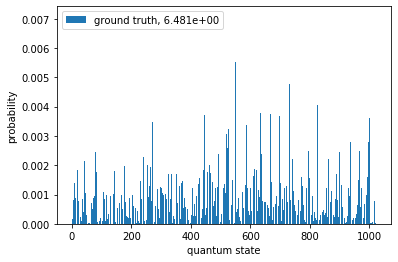

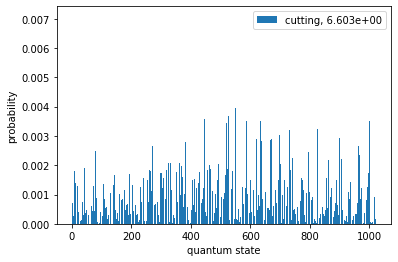

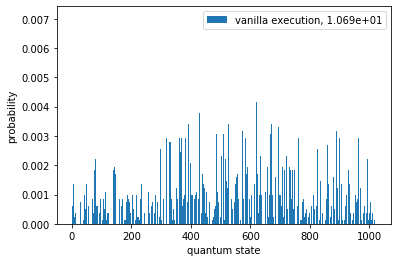

In [4]:
plot_range = min(1024,len(d1))
x = np.arange(len(d1))[:plot_range]
y_lim = max(max(d1[:plot_range]),max(d4[:plot_range]),max(d5[:plot_range]))*1.1

plt.figure()
plt.bar(x,height=d1[:plot_range],label='ground truth, %.3e'%cross_entropy(d1,d1))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()
# plt.savefig('ground_truth_eg.png',dpi=400)

plt.figure()
plt.bar(x,height=d5[:plot_range],label='cutting, %.3e'%cross_entropy(d1,d5))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()
# plt.savefig('cutting_eg.png',dpi=400)

plt.figure()
plt.bar(x,height=d4[:plot_range],label='vanilla execution, %.3e'%cross_entropy(d1,d4))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()
# plt.savefig('vanilla_execution_eg.png',dpi=400)

# d1.sort()
# d2.sort()
# d3.sort()
# d4.sort()
# print(d1[-2:])
# print(sum(d1[-2:]),sum(d2[-2:]),sum(d3[-2:]),sum(d4[-2:]))